# 2.3 Pandas

This section aims to provide new skills in python to handle structured, tabular data. 

Learning outcome:
-   Manipulation of data frames (describing, filtering, ...) 
-   Learn about Lambda functions
-   Intro to datetime objects
-   Plotting data from data frames (histograms and maps)
-   Introduction to Plotly
-   Introduction to CSV & Parquet

This tutorial can be offered in a 2-hour course. Sections are labeled as Level 1, 2, 3 in Section 1, 2, 3, and instructors may choose to leave higher levels for asynchronous, self-guided learning.


We will work on several structured data sets: sensor metadata, seismic data product (earthquake catalog).

First, we import all the modules we need:

In [1]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


This notebook uses ``plotly`` to make interactive plots

In [2]:
!pip install plotly
import plotly.express as px
import plotly.io as pio
# pio.renderers.default = 'vscode' # writes as standalone html, 
# pio.renderers.default = 'iframe' # writes files as standalone html, 
# pio.renderers.default = 'png' # writes files as standalone png, 
# try notebook, jupyterlab, png, vscode, iframe


# 1 Pandas Fundamentals

## 1.1 Basics

Pandas are composed of ``Series`` and ``DataFrame``. ``Series`` are columns with attributes or keys. The ``DataFrame`` is a multi-dimensional table made up of ``Series``.

We can create a DataFrame composed of series from scratch using Python dictionary:

In [53]:
data = {
    'temperature' : [36,37,30,50],
    'precipitation':[3,1,0,0]
}
my_pd = pd.DataFrame(data)
print(my_pd)

   temperature  precipitation
0           36              3
1           37              1
2           30              0
3           50              0


Each (key,value) item in the dataframe corresponds to a value in ``data``. To get the keys of the dataframe, type:

In [54]:
my_pd.keys()

Index(['temperature', 'precipitation'], dtype='object')

get a specific ``Series`` (different from the array)

In [55]:
print(my_pd.temperature[:])
print(type(my_pd.temperature[:]))

0    36
1    37
2    30
3    50
Name: temperature, dtype: int64
<class 'pandas.core.series.Series'>


to get the _value_ of a specific key (e.g., temperature), at a specific index (e.g., 2) type:

In [56]:
print(my_pd.temperature[2])
print(type(my_pd.temperature[2]))

30
<class 'numpy.int64'>


## 1.2 Reading a DataFrame from a CSV file

We can read a pandas directly from a standard file. We will download a catalog of earthquakes

In [57]:
fname = ""
gist_dir = ""
!wget "https://gist.githubusercontent.com/UW-MLGEO/MLGEO-dataset/main/data/Global_Quakes_IRIS.csv"
ff = "Global_Quakes_IRIS.csv"
quake = pd.read_csv(ff)

--2024-10-04 06:23:53--  https://gist.githubusercontent.com/UW-MLGEO/MLGEO-dataset/main/data/Global_Quakes_IRIS.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gist.github.com/UW-MLGEO/MLGEO-dataset/main/data/Global_Quakes_IRIS.csv [following]
--2024-10-04 06:23:53--  https://gist.github.com/UW-MLGEO/MLGEO-dataset/main/data/Global_Quakes_IRIS.csv
Resolving gist.github.com (gist.github.com)... 140.82.116.3
Connecting to gist.github.com (gist.github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-10-04 06:23:53 ERROR 404: Not Found.



Now you use the ``head`` function to display what is in the file

In [58]:
# enter answer here
quake.head()

time  latitude  longitude     depth  magnitude  \
0  2010-07-02 06:04:03.570  -13.6098   166.6541   34400.0        6.3   
1  2010-07-04 21:55:52.370   39.6611   142.5792   30100.0        6.3   
2  2010-07-10 11:43:33.000   11.1664   146.0823   16900.0        6.3   
3  2010-07-12 00:11:20.060  -22.2789   -68.3159  109400.0        6.2   
4  2010-07-14 08:32:21.850  -38.0635   -73.4649   25700.0        6.6   

                   description  
0              VANUATU ISLANDS  
1    NEAR EAST COAST OF HONSHU  
2     SOUTH OF MARIANA ISLANDS  
3               NORTHERN CHILE  
4  NEAR COAST OF CENTRAL CHILE

Display the depth using two ways to use the pandas object

In [59]:
print(quake.depth)
print(quake['depth'])

0        34400.0
1        30100.0
2        16900.0
3       109400.0
4        25700.0
          ...   
1780     10000.0
1781    105000.0
1782    608510.0
1783     10000.0
1784     35440.0
Name: depth, Length: 1785, dtype: float64
0        34400.0
1        30100.0
2        16900.0
3       109400.0
4        25700.0
          ...   
1780     10000.0
1781    105000.0
1782    608510.0
1783     10000.0
1784     35440.0
Name: depth, Length: 1785, dtype: float64


Calculate basic statistic of the data using the function ``describe``.

In [60]:
quake.describe()

latitude    longitude          depth    magnitude
count  1785.000000  1785.000000    1785.000000  1785.000000
mean      0.840700    40.608674   82773.187675     6.382403
std      30.579308   125.558363  146988.302031     0.429012
min     -69.782500  -179.957200       0.000000     6.000000
25%     -19.905100   -73.832200   12000.000000     6.100000
50%      -4.478900   113.077800   24400.000000     6.300000
75%      27.161700   145.305700   58000.000000     6.600000
max      74.391800   179.998100  685500.000000     9.100000

Calculate mean and median of specific ``Series``, for example depth.

In [61]:
# answer it here
print(quake.depth.mean())
print(quake.depth.median())

82773.18767507003
24400.0


## 1.3 Manipulating Pandas with Python

### Classic functions
We will now practice how to modify the content of the DataFrame using functions. We will take the example where we want to change the depth values from meters to kilometers. First we can define this operation as a function

In [62]:
# this function converts a value in meters to a value in kilometers
m2km = 1000 # this is defined as a global variable
def meters2kilometers(x):
    return x/m2km


In [63]:
# now test it using the first element of the quake DataFrame
meters2kilometers(quake.depth[0])

34.4

In [64]:
# this function converts a value in meters to a value in kilometers
def meters2kilometers2(x):
    m2km = 1000 # this is defined as a global variable
    return x/m2km

Let's define another function that uses a local instead of global variable

In [65]:
# Apply the meters2kilometers2 function to the 'depth' column and add it as a new column 'depth_km' to the quake DataFrame
quake['depth_km'] = quake['depth'].apply(meters2kilometers2)

# Display the first few rows to verify the new column
quake.head()

time  latitude  longitude     depth  magnitude  \
0  2010-07-02 06:04:03.570  -13.6098   166.6541   34400.0        6.3   
1  2010-07-04 21:55:52.370   39.6611   142.5792   30100.0        6.3   
2  2010-07-10 11:43:33.000   11.1664   146.0823   16900.0        6.3   
3  2010-07-12 00:11:20.060  -22.2789   -68.3159  109400.0        6.2   
4  2010-07-14 08:32:21.850  -38.0635   -73.4649   25700.0        6.6   

                   description  depth_km  
0              VANUATU ISLANDS      34.4  
1    NEAR EAST COAST OF HONSHU      30.1  
2     SOUTH OF MARIANA ISLANDS      16.9  
3               NORTHERN CHILE     109.4  
4  NEAR COAST OF CENTRAL CHILE      25.7

### Lambda functions
We now discuss the **lambda** functions. 
* Lambda functions are small, anonymous functions in Python.
* They are used for quick, simple operations without needing to define a full function using def.
* In geoscience, where we deal with large datasets (e.g., climate data, seismic measurements), lambda functions allow us to process data efficiently.
* Lambda functions in Pandas allow you to quickly transform, filter, or process this data with minimal code.
* Please read additional tutorials from [RealPython](!https://realpython.com/python-lambda/).


In [66]:
lambda x: x * 1.2

<function __main__.<lambda>(x)>

This lambda function multiplies any input ``x`` by 1.2, which could be useful for tasks like converting units (e.g., from km to m).

Below is an example on how to use lambda in a pandas dataframe. 
**Example 1**:
The lambda function lambda ``x: (x - 32) * 5 / 9`` converts Fahrenheit to Celsius for each value in the Temperature_F column.

In [67]:
import pandas as pd

# Sample DataFrame
data = {'Temperature_F': [32, 50, 77, 100]}
df = pd.DataFrame(data)

# Convert Fahrenheit to Celsius
df['Temperature_C'] = df['Temperature_F'].apply(lambda x: (x - 32) * 5 / 9)

print(df)


   Temperature_F  Temperature_C
0             32       0.000000
1             50      10.000000
2             77      25.000000
3            100      37.777778


In [68]:
# Now the equivalent in lambda is:
lambda_meters2kilometers = lambda x:x/1000
# x is the variable

Now apply the function to the entire series
```{admonition} Student response section
This section is left for the student to complete.
```

In [69]:
# apply it to the entire series
lambda_meters2kilometers(quake.depth)

0        34.40
1        30.10
2        16.90
3       109.40
4        25.70
         ...  
1780     10.00
1781    105.00
1782    608.51
1783     10.00
1784     35.44
Name: depth, Length: 1785, dtype: float64

Lambda functions can take several inputs

In [70]:
# you can add several variables into lambda functions
remove_anything = lambda x,y:x-y
remove_anything(3,2)

1

This did not affect the values of the DataFrame, check it:

In [71]:
quake.depth

0        34400.0
1        30100.0
2        16900.0
3       109400.0
4        25700.0
          ...   
1780     10000.0
1781    105000.0
1782    608510.0
1783     10000.0
1784     35440.0
Name: depth, Length: 1785, dtype: float64

Instead, you could overwrite ``quake.depth=X``. Try two approaches but just do it once! You can use python functions ``map`` (a function to apply functions that is generic to Python) and ``apply`` (a function to apply functions that is specific to Pandas).

```{admonition} Student response section
This section is left for the student to complete.
```

Try ``map`` to apply a ``lambda`` function that rescale depth from meters to kilometers.

In [72]:
# implement answer here

Discuss in class: What happened to the depth field?

What happened to the original data frame?

Try ``apply`` to apply a ``lambda`` function that rescale depth from meters to kilometers.

In [73]:
# or like this
quake.depth=quake.depth.apply(lambda x:x/1000)

Plot a histogram of the depth distributions using matplotlib function ``hist``.

```{admonition} Student response section
This section is left for the student to complete.
```

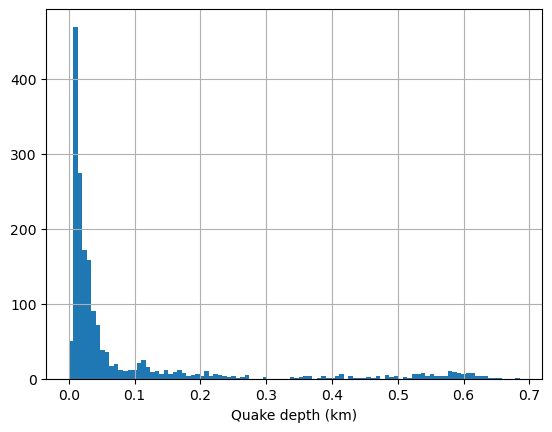

In [74]:
# implement answer here

You can use the interactive plotting package Plotly. First we will show a histogram of the event depth using the function ``histogram``.

In [75]:
fig = px.histogram(quake,   #specify what dataframe to use
             x="depth",  #specify the variable for the histogram 
             nbins=50,       #number of bins for the histogram 
             height=400,     #dimensions of the figure
             width=600);
fig.show()

### Example 2: Conditional Logic for Earthquake Magnitude 
You can use lambda functions to add conditional logic, such as classifying earthquake magnitudes into categories.

Scenario: You have a column Magnitude containing seismic event magnitudes, and you want to classify events as "Minor", "Moderate", or "Severe".

In [76]:
# Classify earthquake magnitudes
quake['Category'] = quake['magnitude'].apply(lambda x: 'Minor' if x < 4.0 else ('Moderate' if x < 6.5 else 'Severe'))
quake.head()


time  latitude  longitude   depth  magnitude  \
0  2010-07-02 06:04:03.570  -13.6098   166.6541  0.0344        6.3   
1  2010-07-04 21:55:52.370   39.6611   142.5792  0.0301        6.3   
2  2010-07-10 11:43:33.000   11.1664   146.0823  0.0169        6.3   
3  2010-07-12 00:11:20.060  -22.2789   -68.3159  0.1094        6.2   
4  2010-07-14 08:32:21.850  -38.0635   -73.4649  0.0257        6.6   

                   description  depth_km  Category  
0              VANUATU ISLANDS      34.4  Moderate  
1    NEAR EAST COAST OF HONSHU      30.1  Moderate  
2     SOUTH OF MARIANA ISLANDS      16.9  Moderate  
3               NORTHERN CHILE     109.4  Moderate  
4  NEAR COAST OF CENTRAL CHILE      25.7    Severe

We will now make a new plot of the location of the earthquakes. We will use Plotly tool. 

The markersize will be scaled with the earthquake magnitude. To do so, we add a ``marker_size`` series in the DataFrame

In [77]:
quake['marker_size'] = quake['magnitude'].apply(lambda x: np.fix(np.exp(x))) # add marker size as exp(mag)
quake['magnitude_bin'] = quake['magnitude'].apply(lambda x: 0.5*np.fix(2*x)) # add marker size as exp(mag)

In [78]:
# another way to do it
quake['marker_size'] = np.fix(np.exp(quake['magnitude'])) # add marker size as exp(mag)
quake['magnitude_bin'] = 0.5*np.fix(2*quake['magnitude']) # add marker size as exp(mag)

### 1.4 Intermediate Manipulation with Pandas

You can also apply lambda functions to work with multiple columns, which is common in geoscientific datasets, where you might have spatial or temporal data.

**Example 3: Calculating an Index Based on Multiple Measurements**
Scenario: You have rainfall (``Rainfall_mm``) and evaporation (``Evaporation_mm``) data, and you want to calculate the ``Net Water Balance ``for each record.

In [79]:
data = {'Rainfall_mm': [100, 80, 120], 'Evaporation_mm': [60, 70, 65]}
df = pd.DataFrame(data)

# Calculate Net Water Balance
df['Net_Water_Balance'] = df.apply(lambda row: row['Rainfall_mm'] - row['Evaporation_mm'], axis=1)

print(df)


   Rainfall_mm  Evaporation_mm  Net_Water_Balance
0          100              60                 40
1           80              70                 10
2          120              65                 55


In this example, ``lambda row: row['Rainfall_mm'] - row['Evaporation_mm']`` calculates the net water balance by subtracting evaporation from rainfall for each record.

### 1.5 Advanced: Time Series Data Manipulation with Lambda Functions
Geoscientists frequently work with time series data (e.g., climate data). Lambda functions can be used for efficient data transformations within time series.

**Example 4: Applying a Rolling Window Calculation**
Scenario: Suppose you have daily temperature data, and you want to calculate a 7-day rolling average.

In [80]:
# Sample daily temperature data
data = {'Date': pd.date_range(start='2023-09-01', periods=10, freq='D'),
        'Temperature_C': [20, 22, 23, 21, 19, 24, 25, 26, 22, 20]}
df = pd.DataFrame(data)

# Calculate 7-day rolling average using lambda
df['7_day_avg'] = df['Temperature_C'].rolling(window=3).apply(lambda x: x.mean())
df.head()

Date  Temperature_C  7_day_avg
0 2023-09-01             20        NaN
1 2023-09-02             22        NaN
2 2023-09-03             23  21.666667
3 2023-09-04             21  22.000000
4 2023-09-05             19  21.000000

Here, ``lambda x: x.mean()`` calculates the rolling mean over a 3-day window for temperature data, which is essential in climate analysis for smoothing short-term fluctuations.



In [81]:
### 1.6 Aggregate function

The ``agg``  is a powerful method in Pandas that allows you to perform multiple operations on DataFrames and Series. You can apply one or more aggregation functions such as ``sum``, ``mean``, ``min``, ``max``, etc., on different columns or groups of data.

SyntaxError: invalid syntax (2300505024.py, line 3)

In [48]:
# Sample DataFrame
data = {
    'A': [1, 2, 3, 4],
    'B': [5, 6, 7, 8]
}
df = pd.DataFrame(data)

# Apply aggregation functions
result = df['A'].agg(['sum', 'mean'])
print(result)


sum     10.0
mean     2.5
Name: A, dtype: float64


####  Aggregating Multiple Columns with Multiple Functions
You can pass a dictionary to agg where the keys are column names and the values are the functions to be applied.

In [49]:
# Apply different functions to different columns
result = df.agg({'A': ['sum', 'mean'], 'B': ['min', 'max']})
print(result)


         A    B
sum   10.0  NaN
mean   2.5  NaN
min    NaN  5.0
max    NaN  8.0


In this example, column 'A' gets ``sum`` and ``mean``, while column 'B' gets ``min`` and ``max``.

You may also use costum functions

In [50]:
# Custom function to calculate range (max - min)
def data_range(x):
    return x.max() - x.min()

# Apply custom function
result = df.agg({'A': ['mean', data_range], 'B': data_range})
print(result)


              A    B
mean        2.5  NaN
data_range  3.0  3.0


## 2.4 Mapping using Plotly

Now we will plot the earthquakes locations on a map using the Plotly package. More tutorials on [Plotly](https://plotly.com/). The input of the function is self-explanatory and typical of Python's function. The code [documentation](https://plotly.com/python/scatter-plots-on-maps/) of Plotly scatter_geo lists the variables.

In [31]:
fig = px.scatter_geo(quake,
                     lat='latitude',lon='longitude', 
                     range_color=(6,9),
                     height=600, width=600,
                     size='marker_size', color='magnitude',
                     hover_name="description",
                     hover_data=['description','magnitude','depth']);
fig.update_geos(resolution=110, showcountries=True)
fig.update_geos(resolution=110, showcountries=True,projection_type="orthographic")
fig

The lambda function ``lambda x: 'Minor' if x < 4.0 else ('Moderate' if x < 6.5 else 'Severe')`` classifies earthquake magnitudes based on their values.

The data was sorted by time. We now want to sort and show the data instead by magnitude. We use the pandas function ``sort`` to create a new DataFrame with sorted values.

In [32]:
quakes2plot=quake.sort_values(by='magnitude_bin')
quakes2plot.head()

time  latitude  longitude    depth  magnitude  \
0     2010-07-02 06:04:03.570  -13.6098   166.6541  0.03440        6.3   
1112  2017-08-31 17:06:55.750   -1.1590    99.6881  0.04314        6.3   
1111  2017-08-27 04:17:51.010   -1.4513   148.0803  0.00800        6.3   
1110  2017-08-19 02:00:52.550  -17.9609  -178.8406  0.54400        6.4   
1108  2017-08-13 03:08:10.560   -3.7682   101.6228  0.03100        6.4   

                   description  depth_km  Category  marker_size  magnitude_bin  
0              VANUATU ISLANDS     34.40  Moderate        544.0            6.0  
1112          SOUTHERN SUMATRA     43.14  Moderate        544.0            6.0  
1111  ADMIRALTY ISLANDS REGION      8.00  Moderate        544.0            6.0  
1110       FIJI ISLANDS REGION    544.00  Moderate        601.0            6.0  
1108          SOUTHERN SUMATRA     31.00  Moderate        601.0            6.0

Now we will plot again using Plotly

In [33]:
fig = px.scatter_geo(quakes2plot,
                     lat='latitude',lon='longitude', 
                     range_color=(6,9),
                     height=600, width=600,
                     size='marker_size', color='magnitude',
                     hover_name="description",
                     hover_data=['description','magnitude','depth']);
fig.update_geos(resolution=110, showcountries=True)
# fig.update_geos(resolution=110, showcountries=True,projection_type="orthographic")


# 3 Create a Pandas from a generic text file.

The python package pandas is very useful to read csv files, but also many text files that are more or less formatted as one observation per row and one column for each feature.

As an example, we are going to look at the list of seismic stations from the Northern California seismic network, available [here](http://ncedc.org/ftp/pub/doc/NC.info/NC.channel.summary.day):



In [34]:
url = 'http://ncedc.org/ftp/pub/doc/NC.info/NC.channel.summary.day'

In [35]:
# this gets the file linked in the URL page and convert it to a string
s = requests.get(url).content 

In [36]:
# this will convert the string, decode it , and make it a table
data = pd.read_csv(io.StringIO(s.decode('utf-8')), header=None, skiprows=2, sep='\s+', usecols=list(range(0, 13)))
# because columns/keys were not assigned, assign them now
data.columns = ['station', 'network', 'channel', 'location', 'rate', 'start_time', 'end_time', 'latitude', 'longitude', 'elevation', 'depth', 'dip', 'azimuth']

Let us look at the data. They are now stored into a pandas dataframe.

In [37]:
data.head()

station network channel location   rate           start_time  \
0     AAR      NC     EHZ       --    0.0  1976/07/20,17:38:00   
1     AAR      NC     EHZ       --    0.0  1977/12/01,22:37:00   
2     AAR      NC     EHZ       --    0.0  1981/06/12,19:15:00   
3     AAR      NC     EHZ       --  100.0  1984/01/01,00:00:00   
4     AAR      NC     EHZ       --  100.0  1985/11/03,22:00:00   

              end_time  latitude  longitude  elevation  depth   dip  azimuth  
0  1977/12/01,22:37:00  39.27594 -121.02696      911.0    0.0 -90.0      0.0  
1  1981/06/12,19:15:00  39.27594 -121.02696      911.0    0.0 -90.0      0.0  
2  1984/01/01,00:00:00  39.27594 -121.02696      911.0    0.0 -90.0      0.0  
3  1985/11/03,22:00:00  39.27594 -121.02696      911.0    0.0 -90.0      0.0  
4  1987/03/10,23:15:00  39.27594 -121.02696      911.0    0.0 -90.0      0.0

We can output the first element of the DataFrame:

In [38]:
data.iloc[0]

station                       AAR
network                        NC
channel                       EHZ
location                       --
rate                          0.0
start_time    1976/07/20,17:38:00
end_time      1977/12/01,22:37:00
latitude                 39.27594
longitude              -121.02696
elevation                   911.0
depth                         0.0
dip                         -90.0
azimuth                       0.0
Name: 0, dtype: object

In [39]:
# display the type of each column
data.dtypes

station        object
network        object
channel        object
location       object
rate          float64
start_time     object
end_time       object
latitude      float64
longitude     float64
elevation     float64
depth         float64
dip           float64
azimuth       float64
dtype: object

In [40]:
data.iloc[:, 0]

0         AAR
1         AAR
2         AAR
3         AAR
4         AAR
         ... 
29434     WMP
29435     WMP
29436     WMP
29437     WSL
29438    WWVB
Name: station, Length: 29439, dtype: object

The ``start_time`` and ``end_time`` are stored as ``object`` or ``string``, convert these columns to datetime objects. With a too-simple prompt, CoPilot may fail at converting:

In [41]:
# convert start_time and end_time to datetime
data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time'] = pd.to_datetime(data['end_time'])

/var/folders/js/lzmy975n0l5bjbmr9db291m00000gn/T/ipykernel_7231/3238846712.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



DateParseError: Unknown datetime string format, unable to parse: 1976/07/20,17:38:00, at position 0

In [44]:
data['startdate'] = pd.to_datetime(data['start_time'], format='%Y/%m/%d,%H:%M:%S')

In [45]:
data.head()

station network channel location   rate           start_time  \
0     AAR      NC     EHZ       --    0.0  1976/07/20,17:38:00   
1     AAR      NC     EHZ       --    0.0  1977/12/01,22:37:00   
2     AAR      NC     EHZ       --    0.0  1981/06/12,19:15:00   
3     AAR      NC     EHZ       --  100.0  1984/01/01,00:00:00   
4     AAR      NC     EHZ       --  100.0  1985/11/03,22:00:00   

              end_time  latitude  longitude  elevation  depth   dip  azimuth  \
0  1977/12/01,22:37:00  39.27594 -121.02696      911.0    0.0 -90.0      0.0   
1  1981/06/12,19:15:00  39.27594 -121.02696      911.0    0.0 -90.0      0.0   
2  1984/01/01,00:00:00  39.27594 -121.02696      911.0    0.0 -90.0      0.0   
3  1985/11/03,22:00:00  39.27594 -121.02696      911.0    0.0 -90.0      0.0   
4  1987/03/10,23:15:00  39.27594 -121.02696      911.0    0.0 -90.0      0.0   

            startdate  
0 1976-07-20 17:38:00  
1 1977-12-01 22:37:00  
2 1981-06-12 19:15:00  
3 1984-01-01 00:00:00  
4 1985-11-03 22:00:00

In [46]:
# do the same for end times
# Avoid 'OutOfBoundsDatetime' error with year 3000
enddate = data['end_time'].str.replace('3000', '2026')
enddate = pd.to_datetime(enddate, format='%Y/%m/%d,%H:%M:%S')
data['enddate'] = enddate

In [47]:
data.head()

station network channel location   rate           start_time  \
0     AAR      NC     EHZ       --    0.0  1976/07/20,17:38:00   
1     AAR      NC     EHZ       --    0.0  1977/12/01,22:37:00   
2     AAR      NC     EHZ       --    0.0  1981/06/12,19:15:00   
3     AAR      NC     EHZ       --  100.0  1984/01/01,00:00:00   
4     AAR      NC     EHZ       --  100.0  1985/11/03,22:00:00   

              end_time  latitude  longitude  elevation  depth   dip  azimuth  \
0  1977/12/01,22:37:00  39.27594 -121.02696      911.0    0.0 -90.0      0.0   
1  1981/06/12,19:15:00  39.27594 -121.02696      911.0    0.0 -90.0      0.0   
2  1984/01/01,00:00:00  39.27594 -121.02696      911.0    0.0 -90.0      0.0   
3  1985/11/03,22:00:00  39.27594 -121.02696      911.0    0.0 -90.0      0.0   
4  1987/03/10,23:15:00  39.27594 -121.02696      911.0    0.0 -90.0      0.0   

            startdate             enddate  
0 1976-07-20 17:38:00 1977-12-01 22:37:00  
1 1977-12-01 22:37:00 1981-06-12 19:15:00  
2 1981-06-12 19:15:00 1984-01-01 00:00:00  
3 1984-01-01 00:00:00 1985-11-03 22:00:00  
4 1985-11-03 22:00:00 1987-03-10 23:15:00

Use Plotly to map the stations.

In [ ]:
data.dropna(inplace=True)
data=data[data.longitude!=0]

In [ ]:
fig = px.scatter_geo(data,
                     lat='latitude',lon='longitude', 
                     range_color=(6,9),
                     height=600, width=600,
                     hover_name="station",
                     hover_data=['network','station','channel','rate']);
fig.update_geos(resolution=110, showcountries=True)


In [ ]:
fig = px.scatter_mapbox(data,
                     lat='latitude',lon='longitude', 
                     range_color=(6,9),mapbox_style="carto-positron",
                     height=600, width=500,
                     hover_name="station",
                     hover_data=['network','station','channel','rate']);
fig.update_layout(title="Northern California Seismic Network")
fig.show()

# 4: Exercise
We will now practice on manipulating pandas. This exercise pulls station metadata from a URL and students are expected to practice on specific tasks.

Download data from the NCEDC URL

In [7]:
url = 'http://ncedc.org/ftp/pub/doc/NC.info/NC.channel.summary.day'

The column names are shown at the top of the text file, make a list of strings of these names  in order to rename the columns once the dataframe is made

In [13]:
# students answer here

In [11]:
# students answer here
# request the data from the URL and use the IO package


0   1    2   3      4                    5                    6   \
0  AAR  NC  EHZ  --    0.0  1976/07/20,17:38:00  1977/12/01,22:37:00   
1  AAR  NC  EHZ  --    0.0  1977/12/01,22:37:00  1981/06/12,19:15:00   
2  AAR  NC  EHZ  --    0.0  1981/06/12,19:15:00  1984/01/01,00:00:00   
3  AAR  NC  EHZ  --  100.0  1984/01/01,00:00:00  1985/11/03,22:00:00   
4  AAR  NC  EHZ  --  100.0  1985/11/03,22:00:00  1987/03/10,23:15:00   

         7          8      9    10    11   12  
0  39.27594 -121.02696  911.0  0.0 -90.0  0.0  
1  39.27594 -121.02696  911.0  0.0 -90.0  0.0  
2  39.27594 -121.02696  911.0  0.0 -90.0  0.0  
3  39.27594 -121.02696  911.0  0.0 -90.0  0.0  
4  39.27594 -121.02696  911.0  0.0 -90.0  0.0

In [14]:
# assign the column names
data.columns = ['station', 'network', 'channel', 'location', 'rate', 'start_time', 'end_time', 'latitude', 'longitude', 'elevation', 'depth', 'dip', 'azimuth']

Find the row of channel KCPB

In [16]:
# find the row of station KCPB

station network channel location  rate           start_time  \
15600    KCPB      NC     BHE       --  50.0  1999/08/03,00:00:00   
15601    KCPB      NC     BHE       --  50.0  2000/06/06,00:00:00   
15602    KCPB      NC     BHE       --  50.0  2000/06/06,16:00:00   
15603    KCPB      NC     BHE       --  50.0  2000/07/12,00:00:00   
15604    KCPB      NC     BHE       --  50.0  2002/01/24,00:00:00   
...       ...     ...     ...      ...   ...                  ...   
15728    KCPB      NC     MNE       --  10.0  2000/06/06,16:00:00   
15729    KCPB      NC     MNN       --  10.0  1999/08/03,00:00:00   
15730    KCPB      NC     MNN       --  10.0  2000/06/06,16:00:00   
15731    KCPB      NC     MNZ       --  10.0  1999/08/03,00:00:00   
15732    KCPB      NC     MNZ       --  10.0  2000/06/06,16:00:00   

                  end_time  latitude  longitude  elevation  depth   dip  \
15600  2000/06/06,00:00:00  39.68631 -123.58242     1261.0    0.0   0.0   
15601  2000/06/06,16:00:00  39.68631 -123.58242     1261.0    0.0   0.0   
15602  2000/07/12,00:00:00  39.68631 -123.58242     1261.0    0.0   0.0   
15603  2002/01/24,00:00:00  39.68631 -123.58242     1261.0    0.0   0.0   
15604  2002/01/24,23:50:00  39.68631 -123.58242     1261.0    0.0   0.0   
...                    ...       ...        ...        ...    ...   ...   
15728  2000/07/12,00:00:00  39.68631 -123.58242     1261.0    0.0   0.0   
15729  2000/06/06,16:00:00  39.68631 -123.58242     1261.0    0.0   0.0   
15730  2000/07/12,00:00:00  39.68631 -123.58242     1261.0    0.0   0.0   
15731  2000/06/06,16:00:00  39.68631 -123.58242     1261.0    0.0 -90.0   
15732  2000/07/12,00:00:00  39.68631 -123.58242     1261.0    0.0 -90.0   

       azimuth  
15600     90.0  
15601     90.0  
15602     90.0  
15603     90.0  
15604     90.0  
...        ...  
15728     90.0  
15729      0.0  
15730      0.0  
15731      0.0  
15732      0.0  

[133 rows x 13 columns]

Now select two stations of your choice using ``|``.

In [17]:
# answer below

station network channel location  rate           start_time  \
15600    KCPB      NC     BHE       --  50.0  1999/08/03,00:00:00   
15601    KCPB      NC     BHE       --  50.0  2000/06/06,00:00:00   
15602    KCPB      NC     BHE       --  50.0  2000/06/06,16:00:00   
15603    KCPB      NC     BHE       --  50.0  2000/07/12,00:00:00   
15604    KCPB      NC     BHE       --  50.0  2002/01/24,00:00:00   
...       ...     ...     ...      ...   ...                  ...   
16345    KHBB      NC     VFP       --   0.1  2022/08/09,18:00:00   
16346    KHBB      NC     VKI       --   0.1  2022/08/09,18:00:00   
16347    KHBB      NC     VMU       --   0.1  2022/08/09,18:00:00   
16348    KHBB      NC     VMV       --   0.1  2022/08/09,18:00:00   
16349    KHBB      NC     VMW       --   0.1  2022/08/09,18:00:00   

                  end_time  latitude  longitude  elevation  depth   dip  \
15600  2000/06/06,00:00:00  39.68631 -123.58242     1261.0    0.0   0.0   
15601  2000/06/06,16:00:00  39.68631 -123.58242     1261.0    0.0   0.0   
15602  2000/07/12,00:00:00  39.68631 -123.58242     1261.0    0.0   0.0   
15603  2002/01/24,00:00:00  39.68631 -123.58242     1261.0    0.0   0.0   
15604  2002/01/24,23:50:00  39.68631 -123.58242     1261.0    0.0   0.0   
...                    ...       ...        ...        ...    ...   ...   
16345  3000/01/01,00:00:00  40.65990 -123.21966     1864.0    0.0   0.0   
16346  3000/01/01,00:00:00  40.65990 -123.21966     1864.0    0.0   0.0   
16347  3000/01/01,00:00:00  40.65990 -123.21966     1864.0    0.0 -54.7   
16348  3000/01/01,00:00:00  40.65990 -123.21966     1864.0    0.0 -54.7   
16349  3000/01/01,00:00:00  40.65990 -123.21966     1864.0    0.0 -54.7   

       azimuth  
15600     90.0  
15601     90.0  
15602     90.0  
15603     90.0  
15604     90.0  
...        ...  
16345      0.0  
16346      0.0  
16347     90.0  
16348    330.0  
16349    210.0  

[228 rows x 13 columns]

Now select a given station and a specific channel code, example is ``KCPB`` and channel code ``HNZ``.

In [18]:
# Select two stations, use the typical "AND" 

station network channel location   rate           start_time  \
15701    KCPB      NC     HNZ       --  100.0  2002/10/17,00:00:00   
15702    KCPB      NC     HNZ       --  100.0  2006/06/26,00:00:00   
15703    KCPB      NC     HNZ       --  100.0  2006/10/18,00:08:00   
15704    KCPB      NC     HNZ       --  100.0  2006/10/19,00:00:00   
15705    KCPB      NC     HNZ       --  100.0  2006/11/14,23:30:00   
15706    KCPB      NC     HNZ       --  100.0  2010/11/01,22:00:00   
15707    KCPB      NC     HNZ       --  100.0  2011/07/13,00:00:00   
15708    KCPB      NC     HNZ       --  100.0  2011/09/07,19:00:00   
15709    KCPB      NC     HNZ       --  100.0  2015/10/29,18:00:00   
15710    KCPB      NC     HNZ       --  100.0  2016/04/28,16:39:00   
15711    KCPB      NC     HNZ       --  100.0  2019/09/13,17:30:00   

                  end_time  latitude  longitude  elevation  depth   dip  \
15701  2006/06/26,00:00:00  39.68631 -123.58242     1261.0    0.0 -90.0   
15702  2006/10/18,00:08:00  39.68631 -123.58242     1261.0    0.0 -90.0   
15703  2006/10/19,00:00:00  39.68631 -123.58242     1261.0    0.0 -90.0   
15704  2006/11/14,23:30:00  39.68631 -123.58242     1261.0    0.0 -90.0   
15705  2010/11/01,22:00:00  39.68631 -123.58242     1261.0    0.0 -90.0   
15706  2011/07/13,00:00:00  39.68631 -123.58242     1261.0    0.0 -90.0   
15707  2011/09/07,19:00:00  39.68631 -123.58242     1261.0    0.0 -90.0   
15708  2015/10/29,18:00:00  39.68631 -123.58242     1261.0    0.0 -90.0   
15709  2016/04/28,16:39:00  39.68631 -123.58242     1261.0    0.0 -90.0   
15710  2019/09/13,17:30:00  39.68631 -123.58242     1261.0    0.0 -90.0   
15711  2022/11/15,18:19:00  39.68631 -123.58242     1261.0    0.0 -90.0   

       azimuth  
15701      0.0  
15702      0.0  
15703      0.0  
15704      0.0  
15705      0.0  
15706      0.0  
15707      0.0  
15708      0.0  
15709      0.0  
15710      0.0  
15711      0.0

You may also choose the pandas function ``isin`` to select rows that have a given attribute that belongs to a list. For instance, use ``isin`` to select all rows that have the key ``station`` within a list ``['KCBP','KHBB' ]``.

In [19]:
#  students answer here

station network channel location  rate           start_time  \
15600    KCPB      NC     BHE       --  50.0  1999/08/03,00:00:00   
15601    KCPB      NC     BHE       --  50.0  2000/06/06,00:00:00   
15602    KCPB      NC     BHE       --  50.0  2000/06/06,16:00:00   
15603    KCPB      NC     BHE       --  50.0  2000/07/12,00:00:00   
15604    KCPB      NC     BHE       --  50.0  2002/01/24,00:00:00   
...       ...     ...     ...      ...   ...                  ...   
16345    KHBB      NC     VFP       --   0.1  2022/08/09,18:00:00   
16346    KHBB      NC     VKI       --   0.1  2022/08/09,18:00:00   
16347    KHBB      NC     VMU       --   0.1  2022/08/09,18:00:00   
16348    KHBB      NC     VMV       --   0.1  2022/08/09,18:00:00   
16349    KHBB      NC     VMW       --   0.1  2022/08/09,18:00:00   

                  end_time  latitude  longitude  elevation  depth   dip  \
15600  2000/06/06,00:00:00  39.68631 -123.58242     1261.0    0.0   0.0   
15601  2000/06/06,16:00:00  39.68631 -123.58242     1261.0    0.0   0.0   
15602  2000/07/12,00:00:00  39.68631 -123.58242     1261.0    0.0   0.0   
15603  2002/01/24,00:00:00  39.68631 -123.58242     1261.0    0.0   0.0   
15604  2002/01/24,23:50:00  39.68631 -123.58242     1261.0    0.0   0.0   
...                    ...       ...        ...        ...    ...   ...   
16345  3000/01/01,00:00:00  40.65990 -123.21966     1864.0    0.0   0.0   
16346  3000/01/01,00:00:00  40.65990 -123.21966     1864.0    0.0   0.0   
16347  3000/01/01,00:00:00  40.65990 -123.21966     1864.0    0.0 -54.7   
16348  3000/01/01,00:00:00  40.65990 -123.21966     1864.0    0.0 -54.7   
16349  3000/01/01,00:00:00  40.65990 -123.21966     1864.0    0.0 -54.7   

       azimuth  
15600     90.0  
15601     90.0  
15602     90.0  
15603     90.0  
15604     90.0  
...        ...  
16345      0.0  
16346      0.0  
16347     90.0  
16348    330.0  
16349    210.0  

[228 rows x 13 columns]

**Q** Use panda native functions to calculate how many unique sites (station names) there are in the network.

In [ ]:
# students answer here

**Q** Use pandas native functions to select the unique set of channel codes that end with ``Z``: this will tell you of how many types digitized data the seismic network manages.

In [ ]:
# students answer here

**Q** What station names has the most number of channels? __hint__ you may use ``value_counts()``.

In [ ]:
# students answer here

KCPB    78
JSGB    73
KMPB    72
KHMB    63
CCH1    60
        ..
LAMB     1
LBA      1
PBY      1
MCW      1
MMW      1
Name: station, Length: 905, dtype: int64

**Q** What is the maximum difference in elevation between the stations using lambda functions

In [ ]:
# students answer here

Here, pandas does not recognize the start_time and end_time columns as a datetime format, so we cannot use datetime operations on them. We first need to convert these columns into a datetime format:

In [ ]:
# answer here

In [ ]:
# Transform column from string into datetime format

0      1984-01-01 00:00:00
1      1987-05-01 00:00:00
2      1994-11-28 00:00:00
3      1984-11-27 18:45:00
4      1987-05-01 00:00:00
               ...        
7150   1995-07-02 12:00:00
7151   1995-07-02 12:00:00
7152   1995-03-02 19:00:00
7153   1995-07-02 12:00:00
7154   1995-07-02 12:00:00
Name: start_time, Length: 7136, dtype: datetime64[ns]


pandas._libs.tslibs.timestamps.Timestamp

In [27]:
# do the same for end times

We can now look when each seismic station was installed using ``groupby`` and sorting by the earliest deployment (i.e., the minimum of the start_time)

In [ ]:
# students answer here

station
AAR   1984-01-01 00:00:00
AAS   1984-11-27 18:45:00
ABJ   1984-01-01 00:00:00
ABR   1984-01-01 00:00:00
ADW   1984-01-01 00:00:00
              ...        
VCL   1984-01-01 00:00:00
VRC   1993-09-23 22:20:00
VSP   1993-09-24 22:05:00
VWB   1985-01-01 00:00:00
WMP   1995-03-02 19:00:00
Length: 905, dtype: datetime64[ns]

Select the stations that were deployed first and recovered last using ``agg`` and lambda functions

In [ ]:
# answer here

start_time            end_time
station                                        
AAR     1984-01-01 00:00:00 2006-01-04 19:19:00
AAS     1984-11-27 18:45:00 2021-08-13 16:50:00
ABJ     1984-01-01 00:00:00 2019-06-26 19:17:00
ABR     1984-01-01 00:00:00 1997-08-04 21:02:00
ADW     1984-01-01 00:00:00 2006-04-20 01:08:00
...                     ...                 ...
VCL     1984-01-01 00:00:00 1985-03-25 21:30:00
VRC     1993-09-23 22:20:00 2001-07-12 16:50:00
VSP     1993-09-24 22:05:00 2001-07-12 16:50:00
VWB     1985-01-01 00:00:00 1985-03-25 19:00:00
WMP     1995-03-02 19:00:00 2002-05-08 22:30:00

[905 rows x 2 columns]

# 4. CSV vs Parquet

Parquet is a compressed data format that stores and compresses the columns. It is fast for I/O and compact format.

Save ``data`` into a CSV file:

In [ ]:
%timeit data.to_csv("my_metadata.csv")
!ls -lh my_metadata.csv

66.6 ms ± 4.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


'ls' is not recognized as an internal or external command,
operable program or batch file.


Try and save in Parquet and compare time and memory.

In [ ]:
%timeit data.to_parquet("my_metadata.pq")
!ls -lh my_metadata.pq